In [1]:
import numpy as np
import matplotlib
import math
from matplotlib import pylab as plt
import pandas as pd
import scipy
from matplotlib import animation

from tqdm import tqdm

%matplotlib notebook

# вариант А5

# Явный уголок

Явный уголок:
$\frac{f^{n+1}_i - f^n_i}{\delta t} + a\frac{f^{n}_i - f^n_{i-1}}{\delta x} = 0$

In [10]:
L = 1
a = 0.75
f0 = 2
f1 = 0
x_step = 0.005
x_len = np.arange(0, 5*L, x_step)
t_step = (0.5*x_step)/a
t_len = np.arange(0, 20, t_step)
f = np.zeros((len(x_len), len(t_len)))
f_nonlin = np.zeros((len(x_len), len(t_len)))
f_true = np.zeros((len(x_len), len(t_len)))
f[0,:] = f1
f[:L,0] = f0


In [11]:
for n in (range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        if  a*t_len[n] >  x_len[i]:
            f_true[i,n] = f0
        else:
            f_true[i,n] = f1     

# Линейный случай

In [12]:
n = 0
i = 0
for n in (range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        if 0 < x_len[i] < L:
            f[i,n] = f1
        elif x_len[i] == 0:
            f[i,n] = f0
        else:
            f[i,n] = 0
n = 0
i = 0
for n in tqdm(range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        f[i+1,n+1] = f[i+1,n] - a*t_step*(f[i+1, n] - f[i, n])/x_step
#         print(f[i, n])


100%|█████████████████████████████████████████████████████████████████████████████| 5999/5999 [00:14<00:00, 403.82it/s]


Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


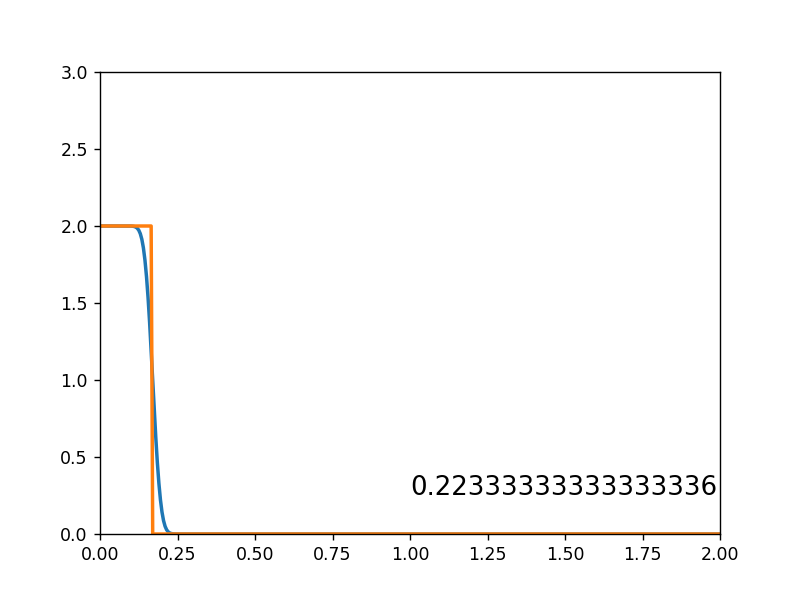

In [13]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(0, 3))
line, = ax.plot([], [], lw=2)
line_tue, = ax.plot([], [], lw=2)

time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_tue.set_data([], [])
    return line,line_tue

# animation function.  This is called sequentially
def animate(i):
    f_t = f[:len(x_len), i]
    f_true_t = f_true[:len(x_len), i]
    line.set_data(x_len, f_t)
    line_tue.set_data(x_len, f_true_t)
    
    time_stamp.set_text(t_len[i])
    return line,line_tue,time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=False, repeat=True)

plt.show()

# Нелинейный случай

In [6]:
L = 1
f0 = 0
f1 = 2
x_step = 0.005
x_L = int(L/x_step )
x_len = np.arange(0, L, x_step)
t_step = (0.5*x_step)/f1
t_len = np.arange(0, 60*L/f1, t_step)
f_nonlin = np.zeros((len(x_len), len(t_len)))
f_true_nonlin = np.zeros((len(x_len), len(t_len)))
f_nonlin[0,:] = f1
f_nonlin[:L,0] = f0


In [7]:
for n in (range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        if  t_len[n] >  x_len[i]:
            f_true_nonlin[i,n] = f1
        else:
            f_true_nonlin[i,n] = f0 

In [8]:
n = 0
i = 0

for n in tqdm(range(len(t_len)-1)) :
    for i in range(len(x_len)-1) :
        f_nonlin[i+1,n+1] = f_nonlin[i+1,n] - 0.5*t_step*((f_nonlin[i+1, n])**2 - (f_nonlin[i, n])**2)/x_step
#         print(f[i, n])


100%|██████████████████████████████████████████████████████████████████████████| 23999/23999 [00:11<00:00, 2164.60it/s]


Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


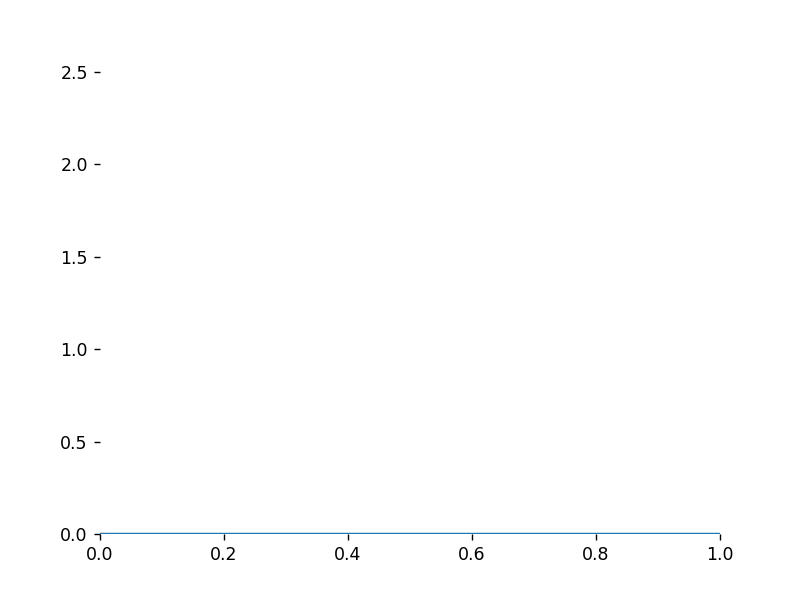

In [9]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2.5))
line, = ax.plot([], [], lw=2)
line_tue, = ax.plot([], [], lw=2)
time_stamp = ax.text(0.5,0.1,0,verticalalignment='center',
                        horizontalalignment='left',
                        transform=ax.transAxes,fontsize=15)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line_tue.set_data([], [])
    return line,line_tue

# animation function.  This is called sequentially
def animate(i):
    f_t = f_nonlin[:len(x_len), i]
    line.set_data(x_len, f_t)
    time_stamp.set_text(t_len[i])
    f_true_t = f_true_nonlin[:len(x_len), i]
    line.set_data(x_len, f_t)
    line_tue.set_data(x_len, f_true_t)
    
    time_stamp.set_text(t_len[i])
    return line,line_tue,time_stamp

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=False, repeat=True)

plt.show()